In [34]:
import numpy as np
import pandas as pd

The colour group 

In [35]:
#loading data_file for colour group
df = pd.read_csv('FOCO (color) data, compiled (version 1).csv', skiprows=[1,2,3,4,5,6,7,8,9])

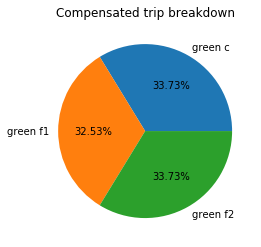

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline


sums = df.groupby(df["condition"])["compensated"].sum()
#axis('equal');
plt.pie(sums, labels=sums.index, autopct='%.2f%%');
plt.title("Compensated trip breakdown")
plt.show()

In [37]:
df['compensated'].value_counts(normalize=True)

1    0.512346
0    0.487654
Name: compensated, dtype: float64

Text(0.5, 1.0, 'Colour group')

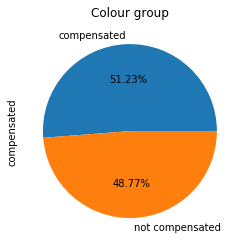

In [38]:
df['compensated'].value_counts(normalize=True).plot(kind="pie", labels= ["compensated", "not compensated"], autopct='%.2f%%')
plt.title("Colour group")

In [39]:

chi = pd.read_csv('FOCO (color) data, compiled.csv', skiprows=[1,2,3,4,5,6,7,8,9])
from scipy.stats import chisquare, chi2_contingency as chi2

chisquare(chi['condition'].value_counts())



Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [40]:

contingencyTable = pd.crosstab(chi['condition'],chi['compensated'])
print(contingencyTable)
chi2(contingencyTable)

#in chi 2 output: first value is the "chi square", second value is the "p-value", then come the "degrees of freedom and the expected frequencies as arrays "
# since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We cannot reject the null hypothesis as the p-value is greater than 0.05.
# in our case the resuts are not significant, and therefore - colour does not affect customer behaviour 

compensated  compensated  not compensated
condition                                
green c               28               26
green f1              27               27
green f2              28               26


(0.04941284123837121, 0.9755962849429427, 2, array([[27.66666667, 26.33333333],
        [27.66666667, 26.33333333],
        [27.66666667, 26.33333333]]))

In [41]:
!pip install researchpy

In [42]:
chi = pd.read_csv('FOCO (color) data, compiled.csv', skiprows=[1,2,3,4,5,6,7,8,9])
import researchpy as rp
table, results = rp.crosstab(chi['condition'], chi['compensated'], prop= 'col', test= 'chi-square')
print(table,"\n\n",results)
#just another ay to show it

          compensated                        
          compensated not compensated     All
condition                                    
green c         33.73           32.91   33.33
green f1        32.53           34.18   33.33
green f2        33.73           32.91   33.33
All            100.00          100.00  100.00 

                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.0494
1                    p-value =    0.9756
2                 Cramer's V =    0.0175


The Control Group 

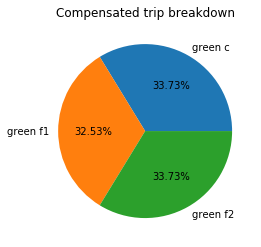

In [44]:
#sat this point we do another chi test. in a larger sampling population we could also do some comparison between groups
df_c = pd.read_csv('FOCO (control) data, compiled (version 1).csv', skiprows=[1,2,3,4,5,6,7,8,9])

sums_c = df_c.groupby(df_c['condition'])['compensated'].sum()
plt.pie(sums, labels=sums.index, autopct='%.2f%%');
plt.title("Compensated trip breakdown")
plt.show()

In [45]:
df_c['compensated'].value_counts(normalize=True)

1    0.697531
0    0.302469
Name: compensated, dtype: float64

Text(0.5, 1.0, 'Control group')

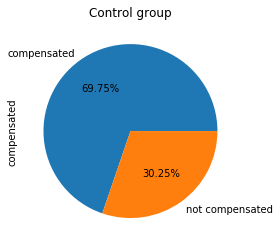

In [46]:
df_c['compensated'].value_counts(normalize=True).plot(kind="pie", labels= ["compensated", "not compensated"], autopct='%.2f%%')
plt.title("Control group")

In [55]:
chi_c = pd.read_csv('FOCO (control) data, compiled.csv', skiprows=[1,2,3,4,5,6,7,8,9])

chisquare(chi_c['condition'].value_counts())

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [56]:
contingencyTable_c = pd.crosstab(chi_c['condition'],chi_c['compensated'])
print(contingencyTable_c)
chi2(contingencyTable_c)

compensated  compensated  not compensated
condition                                
green c               34               20
green f1              41               13
green f2              38               16


(2.1650713382698212, 0.33873551456477846, 2, array([[37.66666667, 16.33333333],
        [37.66666667, 16.33333333],
        [37.66666667, 16.33333333]]))

In [57]:

table, results = rp.crosstab(chi_c['condition'], chi_c['compensated'], prop= 'col', test= 'chi-square')
print(table,"\n\n",results)

          compensated                        
          compensated not compensated     All
condition                                    
green c         30.09           40.82   33.33
green f1        36.28           26.53   33.33
green f2        33.63           32.65   33.33
All            100.00          100.00  100.00 

                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.1651
1                    p-value =    0.3387
2                 Cramer's V =    0.1156
